# Load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load in the processed data 
df_commodities = pd.read_excel('Data/Processed/DAILY_COMMODITY_PRICES.xlsx')[['Date','Price','% Change', 'Ticker']]
df_stocks = pd.read_excel('Data/Processed/DAILY_STOCK_PRICES.xlsx')[['Date', 'Price', '% Return', 'Ticker']]
df_exchange_rate = pd.read_excel('Data/Processed/DAILY_EXCHANGE_RATES.xlsx')[['Date','Mid', '% Change', 'Ticker']]

In [3]:
print(df_commodities.head())
print(df_stocks.head())
print(df_exchange_rate.head())

        Date      Price   % Change     Ticker
0 2018-01-02  50.781433  68.251837  HHGAS-FDS
1 2018-01-03  50.641342  -0.275871  HHGAS-FDS
2 2018-01-04  37.605713 -25.741081  HHGAS-FDS
3 2018-01-05  37.438774  -0.443919  HHGAS-FDS
4 2018-01-08  23.359003 -37.607457  HHGAS-FDS
        Date  Price  % Return     Ticker
0 2018-01-02  204.2  1.139178  AKERBP-NO
1 2018-01-03  207.0  1.371205  AKERBP-NO
2 2018-01-04  208.2  0.579710  AKERBP-NO
3 2018-01-05  209.6  0.672430  AKERBP-NO
4 2018-01-08  211.2  0.763359  AKERBP-NO
        Date       Mid  % Change  Ticker
0 2018-01-02  8.370757 -0.273562  CHFNOK
1 2018-01-03  8.306228 -0.770886  CHFNOK
2 2018-01-04  8.296742 -0.114203  CHFNOK
3 2018-01-05  8.254831 -0.505150  CHFNOK
4 2018-01-08  8.278486  0.286559  CHFNOK


In [4]:
#Check data types, everything ok
print(df_commodities.dtypes)
print(df_stocks.dtypes)
print(df_exchange_rate.dtypes)

#Check for missing values, everything ok
print(df_commodities.isnull().sum())
print(df_stocks.isnull().sum())
print(df_exchange_rate.isnull().sum())

Date        datetime64[ns]
Price              float64
% Change           float64
Ticker              object
dtype: object
Date        datetime64[ns]
Price              float64
% Return           float64
Ticker              object
dtype: object
Date        datetime64[ns]
Mid                float64
% Change           float64
Ticker              object
dtype: object
Date        0
Price       0
% Change    0
Ticker      0
dtype: int64
Date        0
Price       0
% Return    0
Ticker      0
dtype: int64
Date        0
Mid         0
% Change    0
Ticker      0
dtype: int64


In [5]:
#Refine column names
df_commodities.columns = ['Date', 'Price', 'Change_percent', 'Ticker']
df_stocks.columns = ['Date', 'Price', 'Change_percent', 'Ticker']
df_exchange_rate.columns = ['Date', 'Price', 'Change_percent', 'Ticker']

print(df_commodities.head())
print(df_stocks.head())
print(df_exchange_rate.head())

        Date      Price  Change_percent     Ticker
0 2018-01-02  50.781433       68.251837  HHGAS-FDS
1 2018-01-03  50.641342       -0.275871  HHGAS-FDS
2 2018-01-04  37.605713      -25.741081  HHGAS-FDS
3 2018-01-05  37.438774       -0.443919  HHGAS-FDS
4 2018-01-08  23.359003      -37.607457  HHGAS-FDS
        Date  Price  Change_percent     Ticker
0 2018-01-02  204.2        1.139178  AKERBP-NO
1 2018-01-03  207.0        1.371205  AKERBP-NO
2 2018-01-04  208.2        0.579710  AKERBP-NO
3 2018-01-05  209.6        0.672430  AKERBP-NO
4 2018-01-08  211.2        0.763359  AKERBP-NO
        Date     Price  Change_percent  Ticker
0 2018-01-02  8.370757       -0.273562  CHFNOK
1 2018-01-03  8.306228       -0.770886  CHFNOK
2 2018-01-04  8.296742       -0.114203  CHFNOK
3 2018-01-05  8.254831       -0.505150  CHFNOK
4 2018-01-08  8.278486        0.286559  CHFNOK


# Visualize

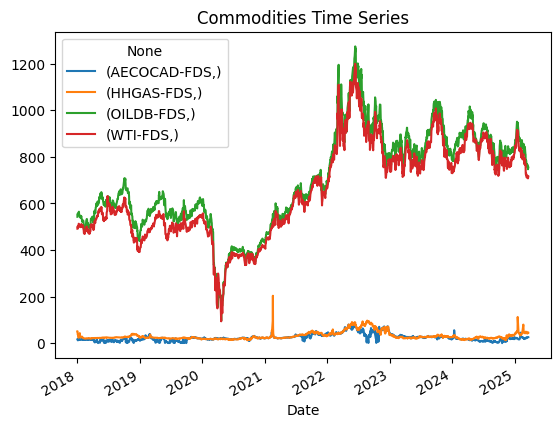

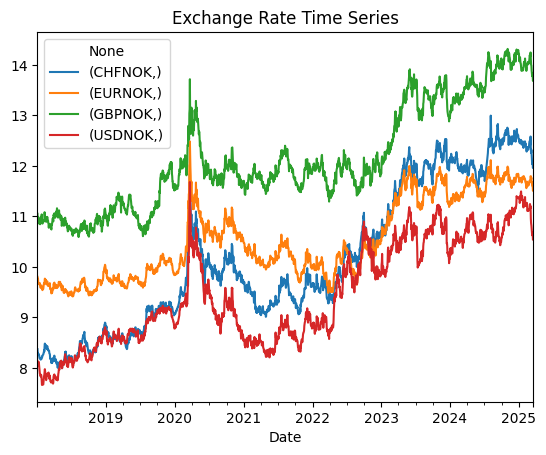

In [6]:
#Plot the time series, price vs date, grouped by ticker
def plot_time_series_price(data, title):
    fig, ax = plt.subplots()
    for key, grp in data.groupby(['Ticker']):
        ax = grp.plot(ax=ax, kind='line', x='Date', y='Price', label=key)
    plt.title(title)
    plt.show()

plot_time_series_price(df_commodities, 'Commodities Time Series')
plot_time_series_price(df_exchange_rate, 'Exchange Rate Time Series')


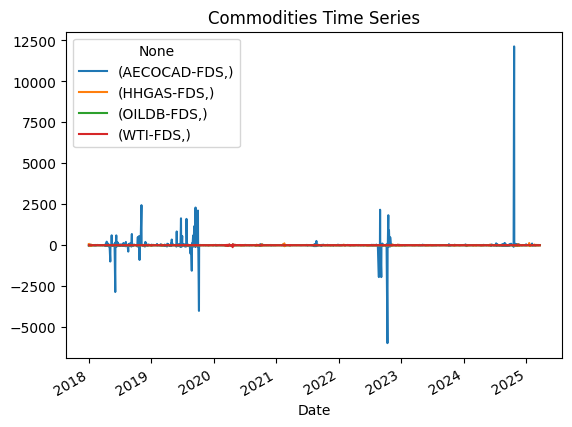

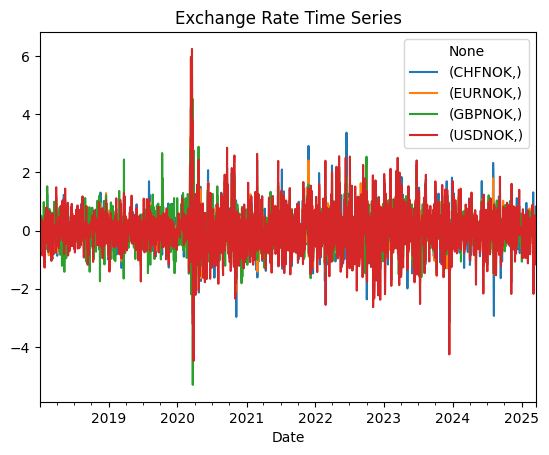

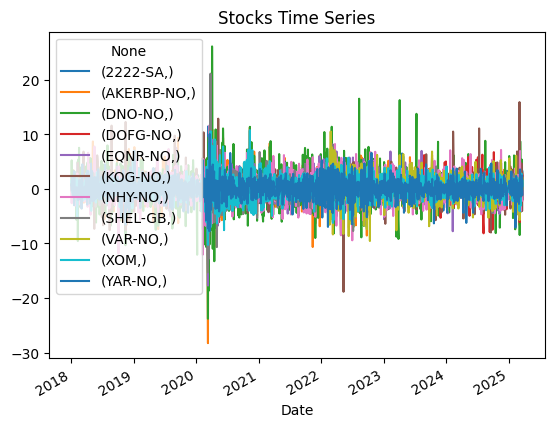

In [7]:
#Plot the time series, % change vs date, grouped by ticker
def plot_time_series_change(data, title):
    fig, ax = plt.subplots()
    for key, grp in data.groupby(['Ticker']):
        ax = grp.plot(ax=ax, kind='line', x='Date', y='Change_percent', label=key)
    plt.title(title)
    plt.show()

plot_time_series_change(df_commodities, 'Commodities Time Series')
plot_time_series_change(df_exchange_rate, 'Exchange Rate Time Series')
plot_time_series_change(df_stocks, 'Stocks Time Series')

# Test for stationarity 
Stationariy is important assumption behind ARIMA. Use the ADF and KPSS test to check for stationarity.

## Check stationarity of prices

In [8]:
#Check stock prices for stationarity, using ADF and KPSS tests, for each ticker
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
import warnings
def check_stationarity(data, title, returns = False):
    print(title)
    results = []
    
    for key, grp in data.groupby(['Ticker']):
        print(f"\nTicker: {key}")
        series = grp['Price'] if not returns else grp['Change_percent']
        warnings.filterwarnings("ignore")  # Suppress KPSS warnings
        # ADF Test
        adf_result = adfuller(series)
        print(f"ADF Statistic: {adf_result[0]:.4f}")
        print(f"ADF p-value:   {adf_result[1]:.4f}")
        print("ADF Critical Values:")
        for k, v in adf_result[4].items():
            print(f"   {k}: {v:.3f}")
        
        # KPSS Test
        kpss_result = kpss(series, regression='c', nlags='auto')
        print(f"\nKPSS Statistic: {kpss_result[0]:.4f}")
        print(f"KPSS p-value:   {kpss_result[1]:.4f}")
        print("KPSS Critical Values:")
        for k, v in kpss_result[3].items():
            print(f"   {k}: {v:.3f}")
        
        conclusion = 'error'
        # Interpretation of results
        #Clear cases
        if adf_result[1] < 0.05 and kpss_result[1] > 0.05: #ADF reject null: shows stationary, KPSS fail to reject null: shows stationary
            conclusion = 'Stationary'
            print("Conclusion: Likely Stationary")
        elif adf_result[1] > 0.05 and kpss_result[1] < 0.05: #ADF fail to reject null: shows non-stationary, KPSS reject null: shows non-stationary
            conclusion = 'Non-Stationary'
            print("Conclusion: Likely Non-Stationary")
        #Unclear cases, conflicting results
        elif adf_result[1] < 0.05 and kpss_result[1] < 0.05: #ADF reject null: shows stationary, KPSS reject null: shows non-stationary
            conclusion = 'Conflicting Results'
            print("Conclusion: Conflicting Results, ADF shows stationary, KPSS shows non-stationary")
        elif adf_result[1] > 0.05 and kpss_result[1] > 0.05: #ADF fail to reject null: shows non-stationary, KPSS fail to reject null: shows stationary
            conclusion = 'Conflicting Results'
            print("Conclusion: Conflicting Results, ADF shows non-stationary, KPSS shows stationary")
        else:
            print("Error")
        #Create a df summary
        results.append({
            'Type': title,
            'Ticker': key,
            'Conlusion': conclusion,
        })
    return pd.DataFrame(results)

summary1 = check_stationarity(df_stocks, 'Stock Prices Stationarity')
summary2 = check_stationarity(df_commodities, 'Commodities Prices Stationarity')
summary3 = check_stationarity(df_exchange_rate, 'Exchange Rate Prices Stationarity')

#Concat the summaries
summary = pd.concat([summary1, summary2, summary3])
print(summary)







Stock Prices Stationarity

Ticker: ('2222-SA',)
ADF Statistic: -1.7391
ADF p-value:   0.4111
ADF Critical Values:
   1%: -3.435
   5%: -2.864
   10%: -2.568

KPSS Statistic: 3.4286
KPSS p-value:   0.0100
KPSS Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
Conclusion: Likely Non-Stationary

Ticker: ('AKERBP-NO',)
ADF Statistic: -3.0642
ADF p-value:   0.0293
ADF Critical Values:
   1%: -3.434
   5%: -2.863
   10%: -2.568

KPSS Statistic: 0.8421
KPSS p-value:   0.0100
KPSS Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
Conclusion: Conflicting Results, ADF shows stationary, KPSS shows non-stationary

Ticker: ('DNO-NO',)
ADF Statistic: -2.0910
ADF p-value:   0.2482
ADF Critical Values:
   1%: -3.434
   5%: -2.863
   10%: -2.568

KPSS Statistic: 0.8110
KPSS p-value:   0.0100
KPSS Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
Conclusion: Likely Non-Stationary

Ticker: ('DOFG-NO',)
ADF Statistic: -1.6626
ADF p-value:  

As expected, most of the raw prices are non-stationary. This aligns with the common knowledge that stock prices are non-stationary and the visualisations above. Interestingly, the stocks AkerBP, Var-NO and the commodity HHGAS-FDS have conflicting results from the two tests when it comes to stationarity. By looking at the visualisation, it is evident that the prices of these tickers are somewhat more stationary than the rest.

## Check stationarity of returns

In [9]:
#Confirm that returns are stationary
summary1 = check_stationarity(df_stocks, 'Stock Returns Stationarity', returns=True)
summary2 = check_stationarity(df_commodities, 'Commodities Returns Stationarity', returns=True)
summary3 = check_stationarity(df_exchange_rate, 'Exchange Rate Returns Stationarity', returns=True)

#Concat the summaries
summary = pd.concat([summary1, summary2, summary3])
print(summary)


Stock Returns Stationarity

Ticker: ('2222-SA',)
ADF Statistic: -11.1201
ADF p-value:   0.0000
ADF Critical Values:
   1%: -3.435
   5%: -2.864
   10%: -2.568

KPSS Statistic: 0.1158
KPSS p-value:   0.1000
KPSS Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
Conclusion: Likely Stationary

Ticker: ('AKERBP-NO',)
ADF Statistic: -14.1345
ADF p-value:   0.0000
ADF Critical Values:
   1%: -3.434
   5%: -2.863
   10%: -2.568

KPSS Statistic: 0.0424
KPSS p-value:   0.1000
KPSS Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
Conclusion: Likely Stationary

Ticker: ('DNO-NO',)
ADF Statistic: -15.6309
ADF p-value:   0.0000
ADF Critical Values:
   1%: -3.434
   5%: -2.863
   10%: -2.568

KPSS Statistic: 0.0639
KPSS p-value:   0.1000
KPSS Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
Conclusion: Likely Stationary

Ticker: ('DOFG-NO',)
ADF Statistic: -21.4913
ADF p-value:   0.0000
ADF Critical Values:
   1%: -3.445
   5%: -2.8

As expected, returns of all tickers are stationary. This aligns with both our theoretical knowledge and the visualisations above. The ADF and KPSS tests confirm this. We will therefore use the returns for the ARIMA model.

# Forecasting with ARIMA 

## Divide data into training and test sets

In [10]:
#First, we create a dataset for each ticker, saved in a dictionary
stock_dfs = {}
commodities_dfs = {}
exchange_rate_dfs = {}

for key, grp in df_stocks.groupby('Ticker'):
    copy = grp.copy()
    split_idx = int(len(copy) * 0.8)
    train = copy[:split_idx]
    test = copy[split_idx:]
    stock_dfs[key] = {
    "train": train,
    "test": test,
    "actual": copy
    }

for key, grp in df_commodities.groupby('Ticker'):
    copy = grp.copy()
    split_idx = int(len(copy) * 0.8)
    train = copy[:split_idx]
    test = copy[split_idx:]
    commodities_dfs[key] =  {
    "train": train,
    "test": test,
    "actual": copy
    }

for key, grp in df_exchange_rate.groupby('Ticker'):
    copy = grp.copy()
    split_idx = int(len(copy) * 0.8)
    train = copy[:split_idx]
    test = copy[split_idx:]
    exchange_rate_dfs[key] = {
    "train": train,
    "test": test,
    "actual": copy
    }



In [11]:
#Test that the partitioning worked
print(stock_dfs.keys())
print(commodities_dfs.keys())
print(exchange_rate_dfs.keys())

print(stock_dfs['EQNR-NO'])

dict_keys(['2222-SA', 'AKERBP-NO', 'DNO-NO', 'DOFG-NO', 'EQNR-NO', 'KOG-NO', 'NHY-NO', 'SHEL-GB', 'VAR-NO', 'XOM', 'YAR-NO'])
dict_keys(['AECOCAD-FDS', 'HHGAS-FDS', 'OILDB-FDS', 'WTI-FDS'])
dict_keys(['CHFNOK', 'EURNOK', 'GBPNOK', 'USDNOK'])
{'train':             Date   Price  Change_percent   Ticker
10744 2018-01-02  177.45        1.284247  EQNR-NO
10745 2018-01-03  179.70        1.267963  EQNR-NO
10746 2018-01-04  182.25        1.419032  EQNR-NO
10747 2018-01-05  182.30        0.027435  EQNR-NO
10748 2018-01-08  182.90        0.329128  EQNR-NO
...          ...     ...             ...      ...
12178 2023-10-05  341.00        0.634497  EQNR-NO
12179 2023-10-06  340.45       -0.161292  EQNR-NO
12180 2023-10-09  359.65        5.639591  EQNR-NO
12181 2023-10-10  366.20        1.821218  EQNR-NO
12182 2023-10-11  360.80       -1.474607  EQNR-NO

[1439 rows x 4 columns], 'test':             Date   Price  Change_percent   Ticker
12183 2023-10-12  368.65        2.175726  EQNR-NO
12184 2023-10-

## Find optimal ARIMA parameters

This will be done by manually grid searching for the optimal parameters. The optimal parameters are found by minimizing the AIC and BIC score. Since the data is stationary, we know that d = 0. We will proceed with ARMA. 

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

def arima_parameter_search(data):
    aic_results = []
    bic_results = []
    for p in range(6):
        for q in range(6):
            try:
                model = ARIMA(data['Change_percent'], order=(p, 0, q)).fit()
                aic_results.append((p, q, model.aic))
                bic_results.append((p, q, model.bic))
            except:
                continue

    best_aic = sorted(aic_results, key=lambda x: x[2])[0]
    best_bic = sorted(bic_results, key=lambda x: x[2])[0]

    print(f"Best AIC model: ARIMA({best_aic[0]},0,{best_aic[1]}) with AIC = {best_aic[2]}")
    print(f"Best BIC model: ARIMA({best_bic[0]},0,{best_bic[1]}) with BIC = {best_bic[2]}")

    return best_aic[0], best_aic[1], best_bic[0], best_bic[1]

# Result containers
result_stock = []
result_commodities = []
result_exchange_rate = []

# Stocks
for key, value in stock_dfs.items():
    p_aic, q_aic, p_bic, q_bic = arima_parameter_search(value['train'])
    result_stock.append({
        'Type': 'Stock',
        'Ticker': key,
        'AIC_parameters': (p_aic, 0, q_aic),
        'BIC_parameters': (p_bic, 0, q_bic)
    })
    stock_dfs[key].update({'AIC': (p_aic,0, q_aic), 'BIC': (p_bic,0,q_bic)})

# Commodities
for key, value in commodities_dfs.items():
    p_aic, q_aic, p_bic, q_bic = arima_parameter_search(value['train'])
    result_commodities.append({   
        'Type': 'Commodity',
        'Ticker': key,
        'AIC_parameters': (p_aic, 0, q_aic),
        'BIC_parameters': (p_bic, 0, q_bic)
    })
    commodities_dfs[key].update({'AIC': (p_aic,0, q_aic), 'BIC': (p_bic,0,q_bic)})


# Exchange Rates
for key, value in exchange_rate_dfs.items():
    p_aic, q_aic, p_bic, q_bic = arima_parameter_search(value['train'])
    result_exchange_rate.append({   
        'Type': 'Exchange Rate',
        'Ticker': key,
        'AIC_parameters': (p_aic, 0, q_aic),
        'BIC_parameters': (p_bic, 0, q_bic)
    })
    exchange_rate_dfs[key].update({'AIC': (p_aic,0, q_aic), 'BIC': (p_bic,0,q_bic)})

# Combine into DataFrames
result_stock_df = pd.DataFrame(result_stock)
result_commodities_df = pd.DataFrame(result_commodities)
result_exchange_rate_df = pd.DataFrame(result_exchange_rate)

# Merge all into one
summary_df = pd.concat([result_stock_df, result_commodities_df, result_exchange_rate_df], ignore_index=True)

# Display
print(summary_df)


Best AIC model: ARIMA(2,0,2) with AIC = 3709.0522569694467
Best BIC model: ARIMA(1,0,0) with BIC = 3738.138470990251
Best AIC model: ARIMA(5,0,5) with AIC = 6897.480071428738
Best BIC model: ARIMA(0,0,0) with BIC = 6939.148991556014
Best AIC model: ARIMA(2,0,5) with AIC = 7534.197815359807
Best BIC model: ARIMA(0,0,0) with BIC = 7551.396209591173
Best AIC model: ARIMA(0,0,0) with AIC = 1541.989640852396
Best BIC model: ARIMA(0,0,0) with BIC = 1549.6997846968009
Best AIC model: ARIMA(3,0,1) with AIC = 6111.851871270513
Best BIC model: ARIMA(3,0,1) with BIC = 6143.482093511837
Best AIC model: ARIMA(4,0,4) with AIC = 5931.39892606499
Best BIC model: ARIMA(0,0,0) with BIC = 5943.441849415569
Best AIC model: ARIMA(3,0,2) with AIC = 6500.0251567179
Best BIC model: ARIMA(0,0,0) with BIC = 6512.590447492597
Best AIC model: ARIMA(5,0,2) with AIC = 6042.614565373238
Best BIC model: ARIMA(0,0,0) with BIC = 6070.670691825296
Best AIC model: ARIMA(0,0,0) with AIC = 2821.7020145707006
Best BIC model

In [15]:
print(stock_dfs)
print(commodities_dfs)
print(exchange_rate_dfs)

{'2222-SA': {'train':             Date      Price  Change_percent   Ticker
12543 2019-12-12  73.802795        3.917404  2222-SA
12544 2019-12-15  74.560616       -0.593954  2222-SA
12545 2019-12-16  75.470630        2.870865  2222-SA
12546 2019-12-17  74.997060       -0.627481  2222-SA
12547 2019-12-18  72.946710       -2.733920  2222-SA
...          ...        ...             ...      ...
13592 2024-02-21  89.492660        1.270561  2222-SA
13593 2024-02-25  89.735160        0.427897  2222-SA
13594 2024-02-26  89.172270       -0.782548  2222-SA
13595 2024-02-27  89.686870        0.577077  2222-SA
13596 2024-02-28  90.007750        0.357782  2222-SA

[1054 rows x 4 columns], 'test':             Date     Price  Change_percent   Ticker
13597 2024-02-29  89.59183       -0.462099  2222-SA
13598 2024-03-03  88.47048       -0.782124  2222-SA
13599 2024-03-04  87.77273       -1.258139  2222-SA
13600 2024-03-05  88.86625        1.245858  2222-SA
13601 2024-03-06  88.72196       -0.162364  2222

## Fitting the model

In [ ]:
# Fit both the AIC and BIC models to the training data
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.metrics import mean_squared_error

def evaluate_arima_models(data_dict):
   
    for key, value in data_dict.items():
       #Train and test series
        train_series = value['train']['Change_percent']
        test_series = value['test']['Change_percent']
        
       

        # Fit both aic and bic models for comparison
        model_aic = ARIMA(train_series, order=value['AIC']).fit()
        model_bic = ARIMA(train_series, order=value['BIC']).fit()

        # Forecast on test data
        aic_forecast = model_aic.forecast(steps=len(test_series))
        bic_forecast = model_bic.forecast(steps=len(test_series))

        # Evaluate RMSE
        aic_rmse = root_mean_squared_error(test_series, aic_forecast)
        bic_rmse = root_mean_squared_error(test_series, bic_forecast)
        
        # Store results
        data_dict[key].update({
            'AIC_model': model_aic,
            'BIC_model': model_bic,
            'AIC_forecast': aic_forecast,
            'BIC_forecast': bic_forecast,
            'AIC_RMSE': aic_rmse,
            'BIC_RMSE': bic_rmse,
            'Better_Model': 'AIC' if aic_rmse < bic_rmse else 'BIC'
        })

evaluate_arima_models(stock_dfs)
evaluate_arima_models(commodities_dfs)
evaluate_arima_models(exchange_rate_dfs)


        
   
       





In [23]:
def meaningful_summary():
    data_dict = [stock_dfs, commodities_dfs, exchange_rate_dfs]
    merged_dataframes = pd.DataFrame()
    for dictio in data_dict:
        results = []
        for key, value in dictio.items():
            results.append({
                'Ticker': key,
                'AIC_parameters': value['AIC'],
                'BIC_parameters': value['BIC'],
                'AIC_RMSE': value['AIC_RMSE'],
                'BIC_RMSE': value['BIC_RMSE'],
                'Better_Model': value['Better_Model']
            })
        df = pd.DataFrame(results)
        merged_dataframes = pd.concat([merged_dataframes, df], ignore_index=True)
    return merged_dataframes

display(meaningful_summary())

,Ticker,AIC_parameters,BIC_parameters,AIC_RMSE,BIC_RMSE,Better_Model
0,2222-SA,"(2, 0, 2)","(1, 0, 0)",0.870929,0.871896,AIC
1,AKERBP-NO,"(5, 0, 5)","(0, 0, 0)",1.646457,1.644469,BIC
2,DNO-NO,"(2, 0, 5)","(0, 0, 0)",2.218782,2.215786,BIC
3,DOFG-NO,"(0, 0, 0)","(0, 0, 0)",1.927816,1.927816,BIC
4,EQNR-NO,"(3, 0, 1)","(3, 0, 1)",1.632902,1.632902,BIC
5,KOG-NO,"(4, 0, 4)","(0, 0, 0)",2.196893,2.196245,BIC
6,NHY-NO,"(3, 0, 2)","(0, 0, 0)",2.016578,2.015112,BIC
7,SHEL-GB,"(5, 0, 2)","(0, 0, 0)",1.063787,1.063482,BIC
8,VAR-NO,"(0, 0, 0)","(0, 0, 0)",1.919051,1.919051,BIC
9,XOM,"(5, 0, 4)","(0, 0, 1)",1.336063,1.334053,BIC


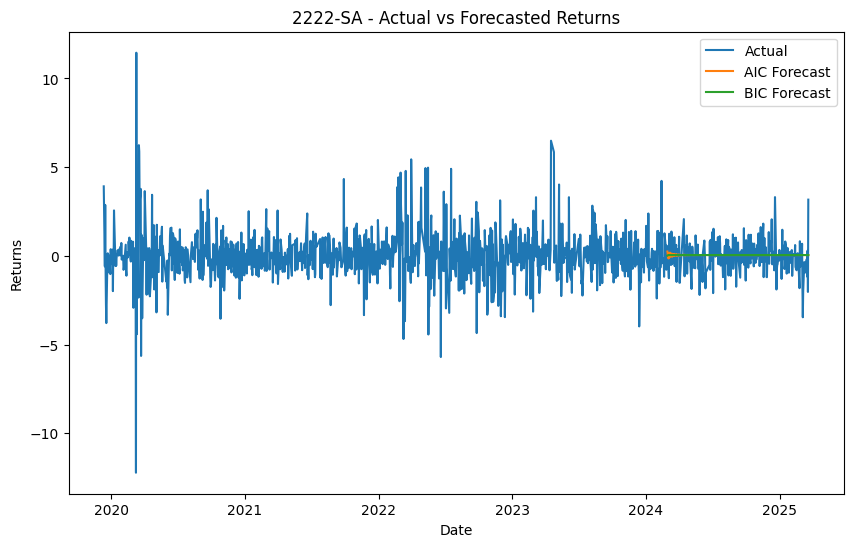

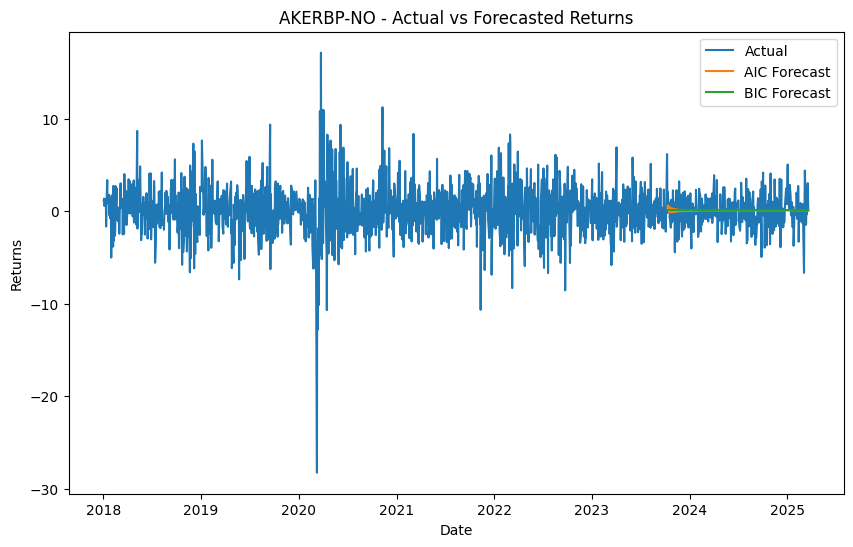

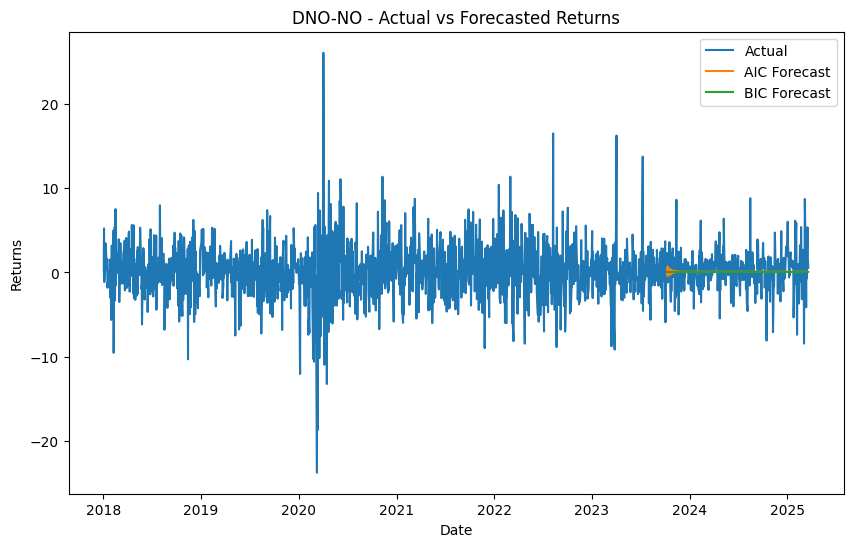

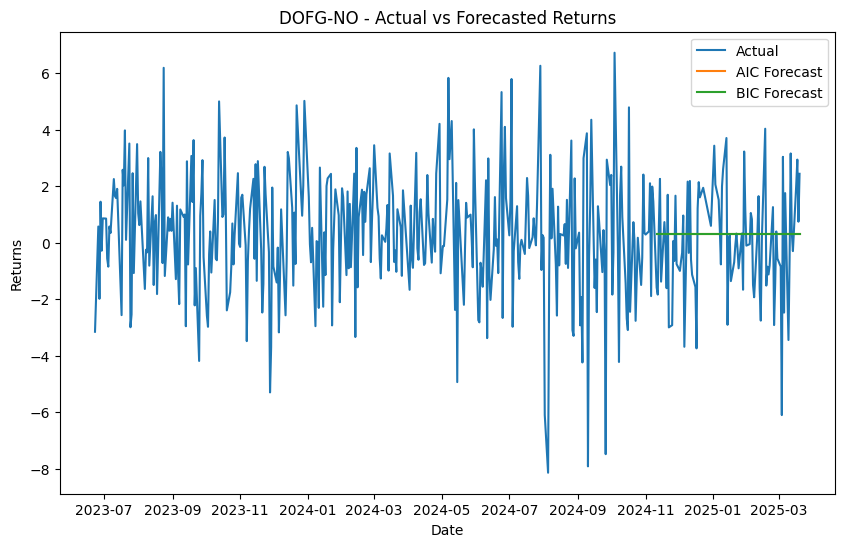

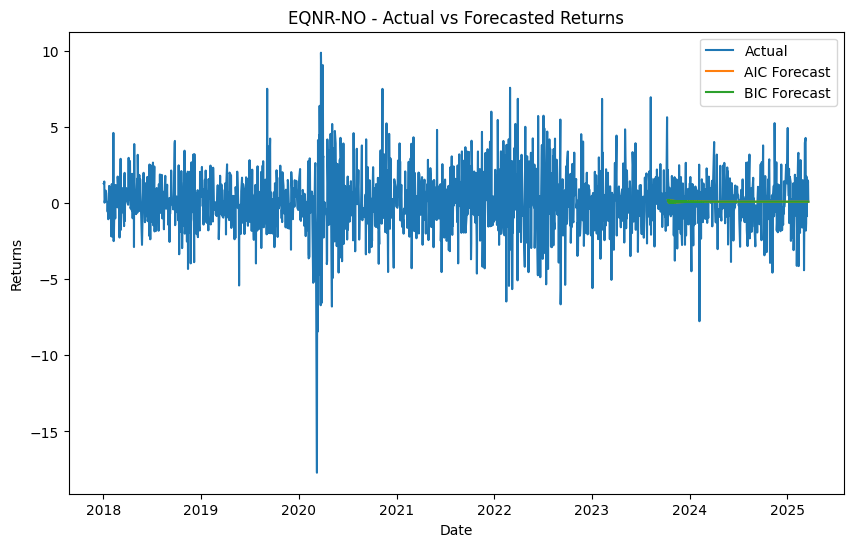

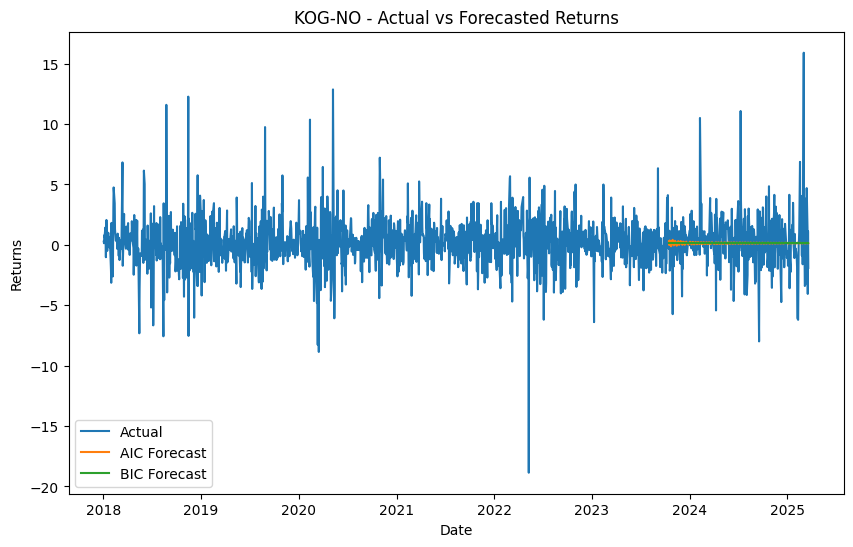

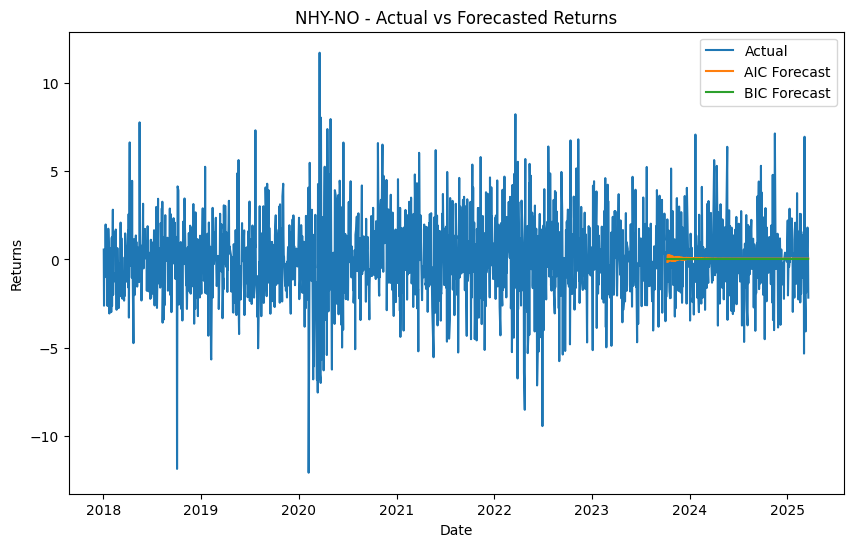

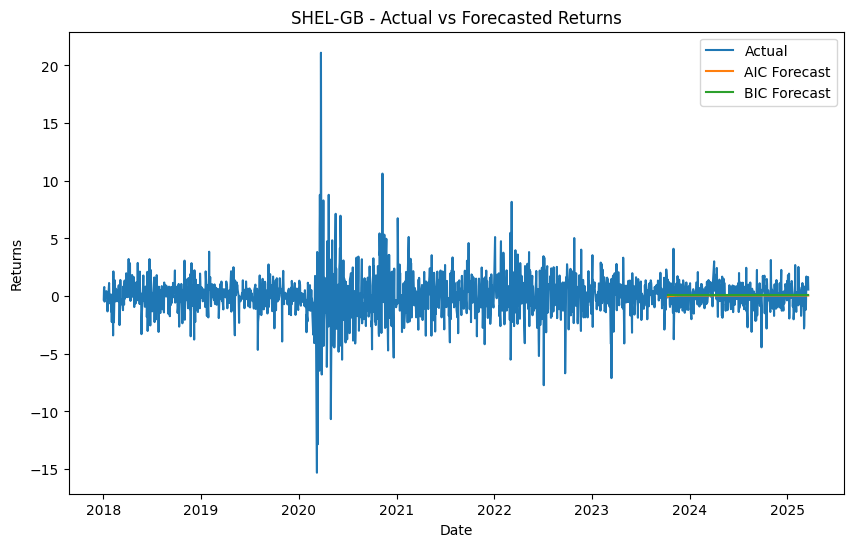

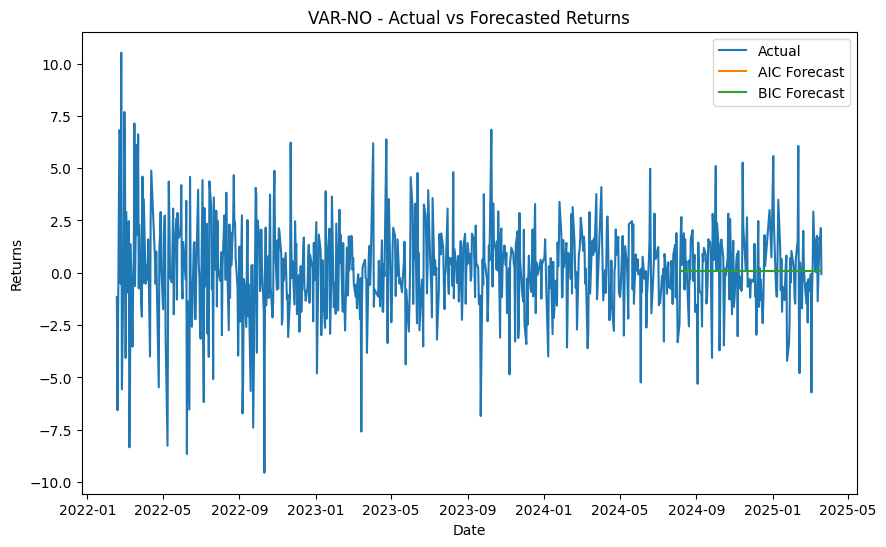

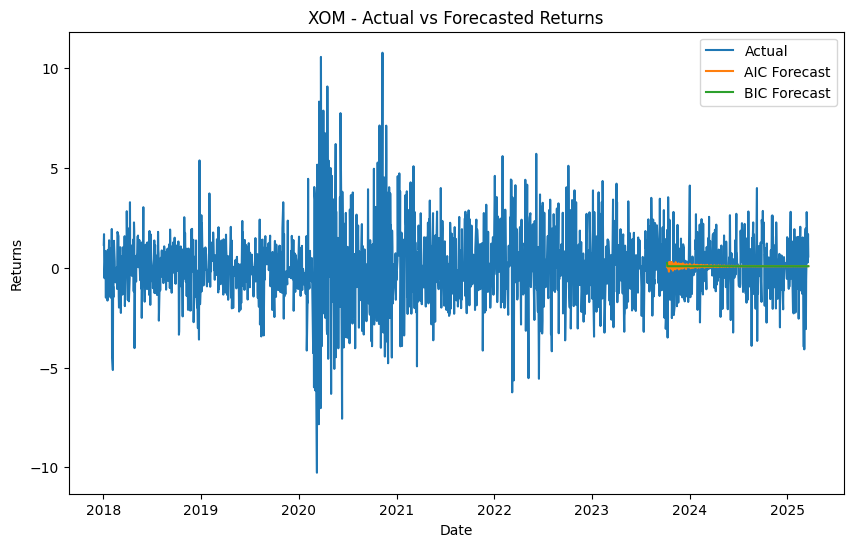

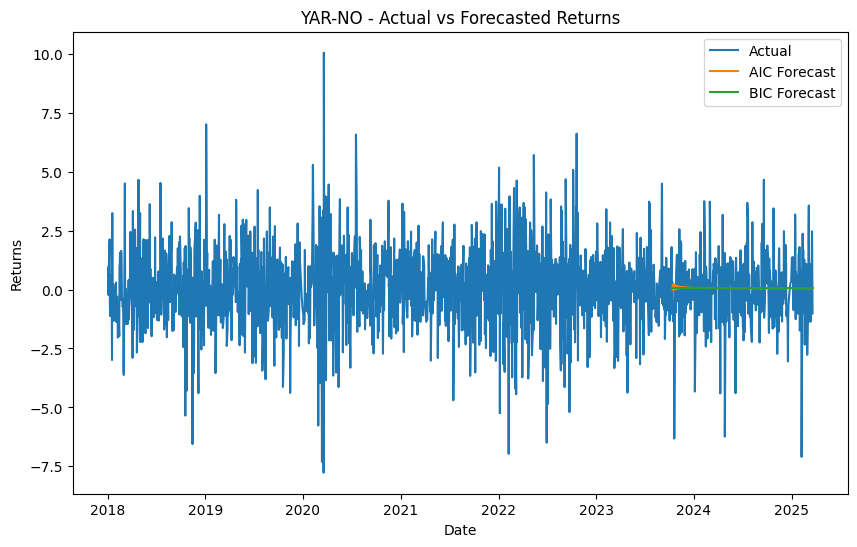

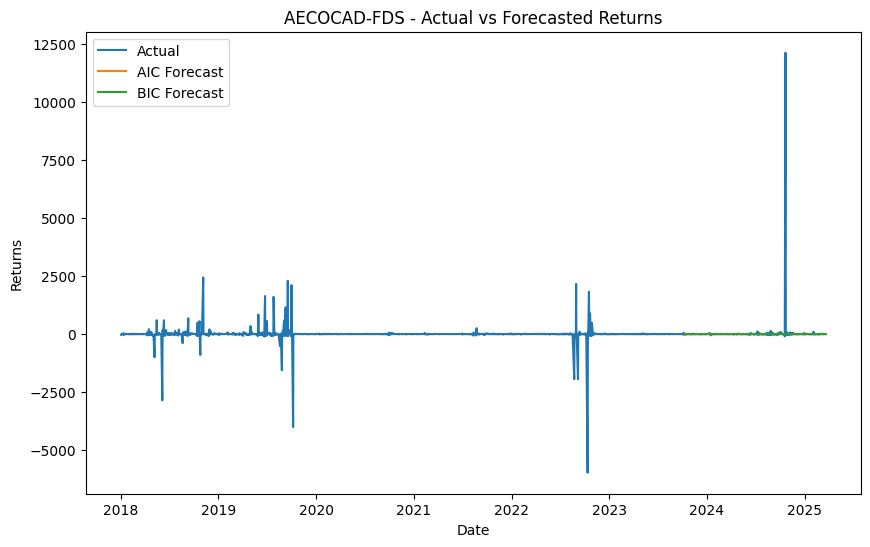

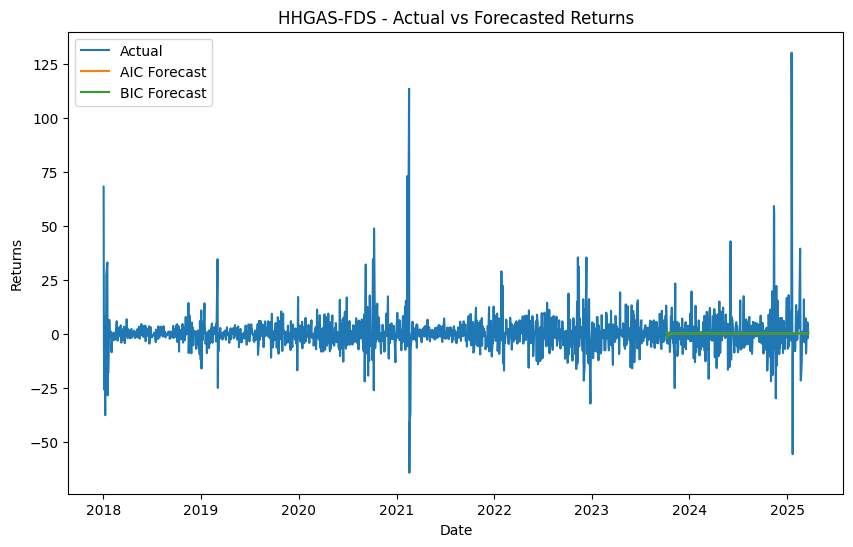

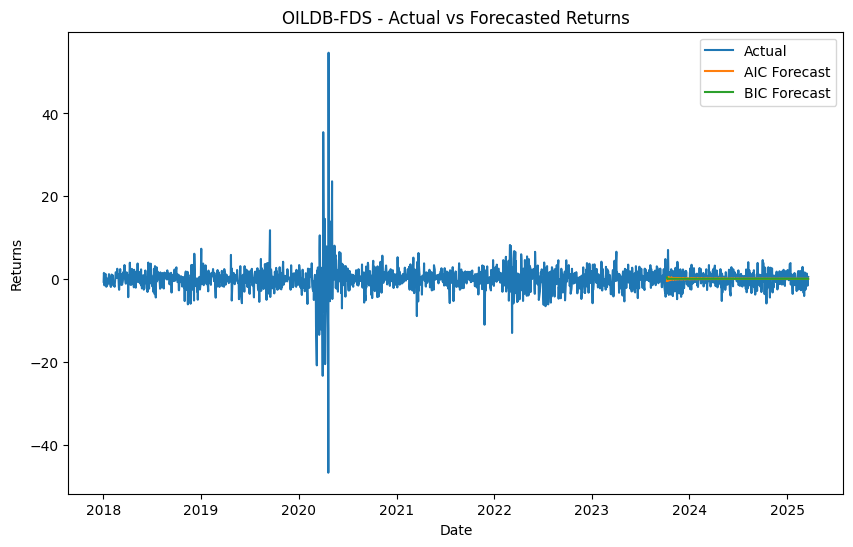

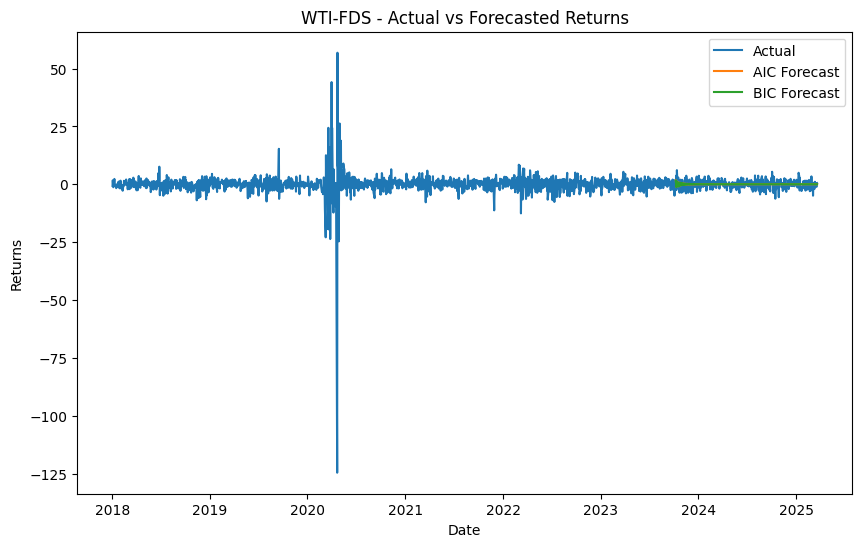

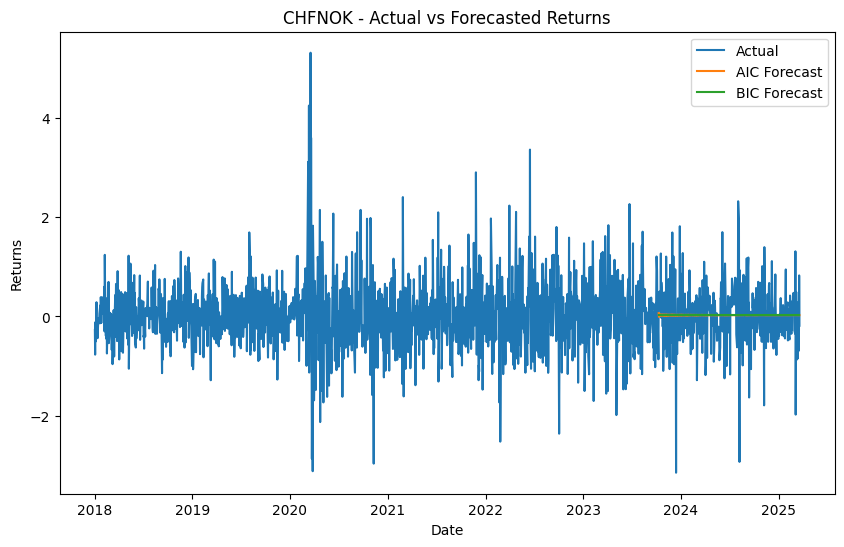

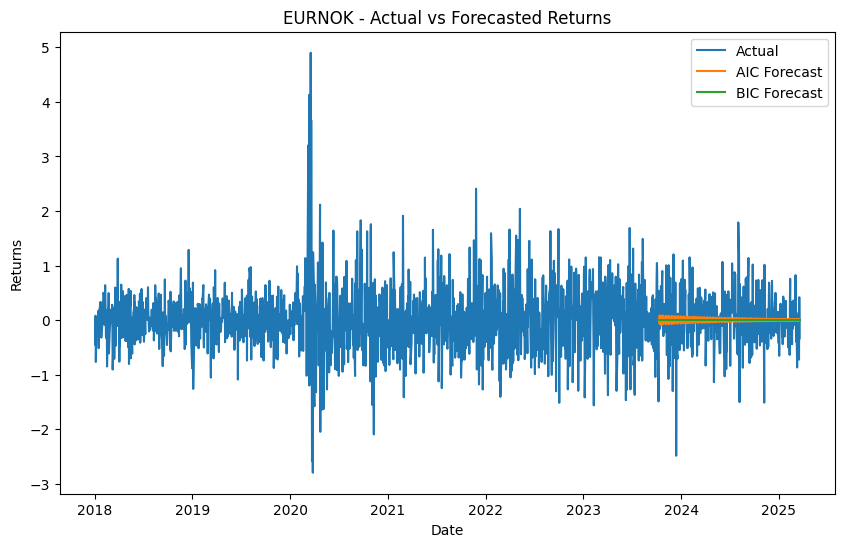

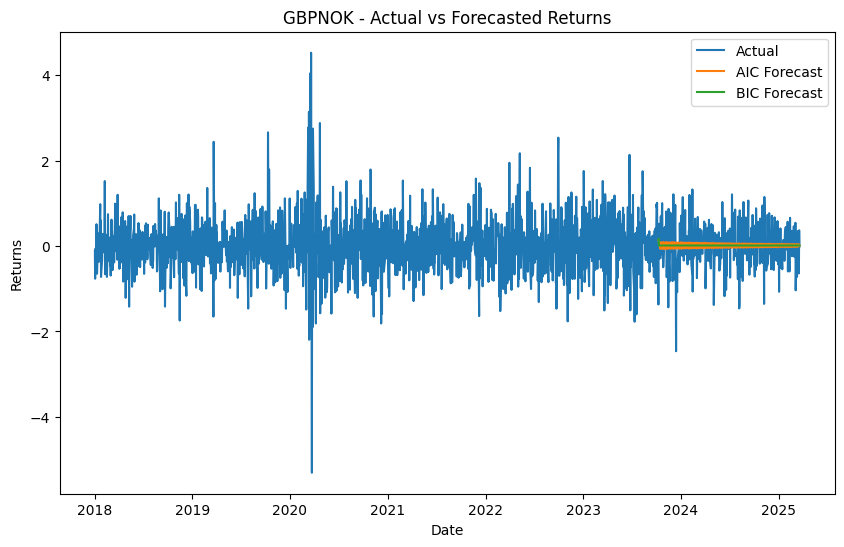

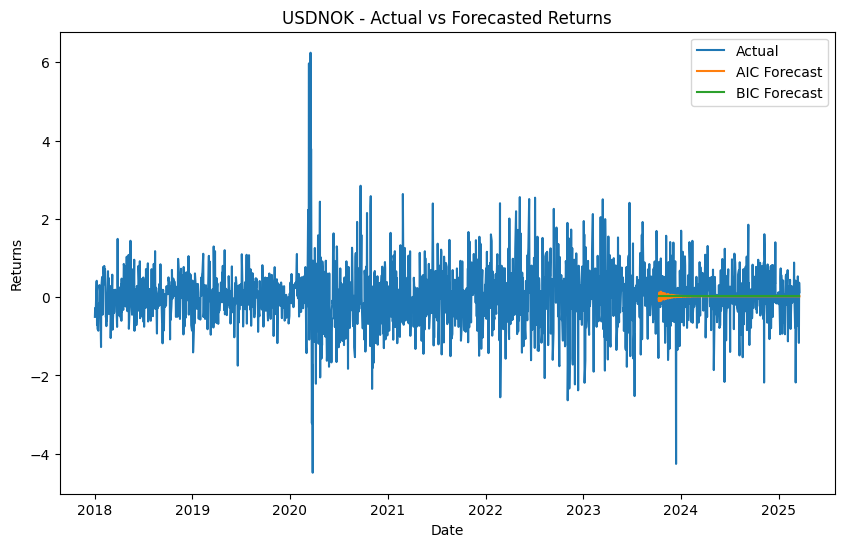

In [27]:
#For each ticker, plot the actual vs forecasted values
def plot_forecasts(data_dict):
    for key, value in data_dict.items():
        plt.figure(figsize=(10, 6))
        plt.plot(value['actual']['Date'], value['actual']['Change_percent'], label='Actual')
        plt.plot(value['test']['Date'], value['AIC_forecast'], label='AIC Forecast')
        plt.plot(value['test']['Date'], value['BIC_forecast'], label='BIC Forecast')
        plt.title(f"{key} - Actual vs Forecasted Returns")
        plt.xlabel('Date')
        plt.ylabel('Returns')
        plt.legend()
        plt.show()

plot_forecasts(stock_dfs)
plot_forecasts(commodities_dfs)
plot_forecasts(exchange_rate_dfs)